In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('experimental_data/geballe_2020_fig3_left_approx.csv')
df = df.copy().iloc[1:].reset_index(drop=True)

# split front/back columns and clean
df_pside = df[['Front', 'Unnamed: 1']].copy()
df_oside = df[['Back',  'Unnamed: 3']].copy()

df_pside.columns = ['time', 'temperature']
df_oside.columns = ['time', 'temperature']

df_pside_approx = (df_pside
            .apply(pd.to_numeric)
            .dropna()
            .sort_values('time')
            .reset_index(drop=True))

df_oside_approx = (df_oside
            .apply(pd.to_numeric)
            .dropna()
            .sort_values('time')
            .reset_index(drop=True))

In [3]:
df = pd.read_csv('experimental_data/raw_temp_time_curve.csv')
df_exact = df.copy().reset_index(drop=True)
df_exact.columns = ['time', 'pside temperature', 'oside temperature']

df_exact = (df_exact
            .apply(pd.to_numeric)
            .dropna()
            .sort_values('time')
            .reset_index(drop=True))

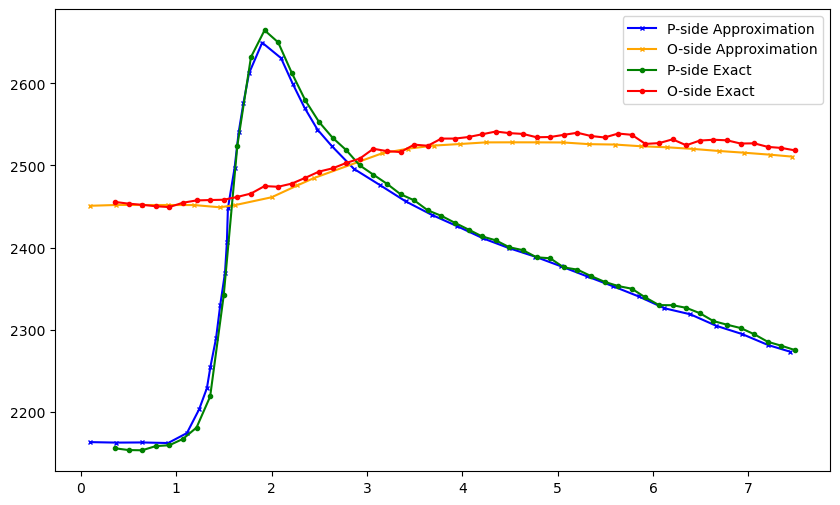

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_pside_approx['time'], df_pside_approx['temperature'], label='P-side Approximation', color='blue', marker ='x', markersize=3)
ax.plot(df_oside_approx['time'], df_oside_approx['temperature'], label='O-side Approximation', color='orange', marker='x', markersize=3)
ax.plot(df_exact['time'], df_exact['pside temperature'], label='P-side Exact', color='green', marker='o', markersize=3)
ax.plot(df_exact['time'], df_exact['oside temperature'], label='O-side Exact', color='red', marker='o', markersize=3)
ax.legend()

In [5]:
print(max(df_exact['oside temperature']) - min(df_oside_approx['temperature']))

92.29060470615468


In [6]:
92 / (max(df_exact['pside temperature']) - min(df_exact['pside temperature']))

0.17982920593826743